In [9]:
#PHIDL Package imports
from __future__ import division, print_function, absolute_import
import numpy as np
from phidl import Device, Layer, LayerSet, make_device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.routing as pr
import phidl.utilities as pu

import csv


def pillar(xCenter,yCenter,xDiam,yDiam,channel):
    pillarRow = Device('pillarRow')
    p1 = pg.ellipse(radii = (xDiam/2,yDiam/2), angle_resolution = 2.5, layer = 1)
    p2 = pg.ellipse(radii = (xDiam/2,yDiam/2), angle_resolution = 2.5, layer = 1)
    c2c = channel+xDiam
    p1.move([xCenter,yCenter])
    p2.move([c2c+xCenter,yCenter])    
    pillarRow << p1
    pillarRow << p2
    return pillarRow

In [10]:
filepath = 'C:/Users/dylan/Documents/MATLAB/DLASimulatorMarkVII/run_v6_latticeDesign_matlabExport.csv'

In [11]:
#import lattice csv as array
#dla = 0 , drift = 1
with open(filepath) as f:
    csv_reader = csv.reader(f)
    lattice = np.zeros((1,3))
    
    for i, line in enumerate(csv_reader):
        #print(line)
        lattice[i,1] = line[1]
        lattice[i,2] = line[2]
        if line[0] == 'DLA':
            lattice[i,0] = 0
            
        elif line[0] == 'Drift':
            lattice[i,0] = 1
            
        lattice = np.vstack((lattice,np.zeros((1,3))))
    #delete last row (unused)
    lattice = np.delete(lattice, (len(lattice)-1), axis=0)

In [12]:
#number of DLA periods
DLAs = int(len(lattice))#-np.sum(lattice[:,0]))
center = np.zeros(DLAs+1)

In [13]:
len(lattice)

715

In [14]:
#populate list of centers
for j in range(0,DLAs):
    if lattice[j,0] == 0:
        #add pillars (offset by 1 period for initial pillar)
        center[j] = np.sum(lattice[0:j,1]);
        #print("DLA")
    elif lattice[j,0] == 1:
        drift = lattice[j,1]
        center[j] = np.sum(lattice[0:j,1]);
        #print("Drift")
        
#add extra pillar on the end
period_add = center[DLAs-1]-center[DLAs-2]
center[DLAs] = center[DLAs-1]+period_add
#print(center)

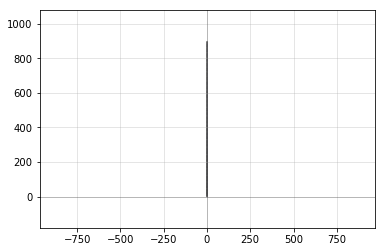

In [15]:
channel = 0.400
xDiam = 0.49
yDiam = 0.8
xPos = 0

center_um = center*1e6 #convert to units of um
period_um = np.diff(center_um)
beta = lattice[:,2]
shift = -0.6754*beta*period_um/(2*np.pi) #shift model from simulations

#since the center_um list has an extra element added on to the end, we must add one to shift too
shift = np.hstack((shift,shift[-1]))

#device designs
beta_cutoff = ([0.55,0.6,0.65,0.7])

#test lattice
A = Device()

#construct lattice
for j, yPos in enumerate(center_um):
    pillarRow = pillar(xPos,yPos+shift[j],xDiam,yDiam,channel)
    A << pillarRow
    
qp(A)

In [16]:
A.flatten()
exportpath = filepath.replace('.csv','.gds')
A.write_gds(exportpath)

'C:/Users/dylan/Documents/MATLAB/DLASimulatorMarkVII/run_v6_latticeDesign_matlabExport.gds'